In [1]:
%load_ext autoreload
%autoreload 2

In [59]:
import sys
import os
import joblib
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from sklearn.pipeline import Pipeline
from pmsurv.models.exponential_model import ExponentialModel
from pmsurv.models.weibull_linear import WeibullModelLinear
from pmsurv.models.weibull_nn import WeibullModelNN
import matplotlib.pyplot as plt

In [3]:
sys.path.append("../experiments")

In [4]:
results_dir = '../experiments/results' #"U:/src/pymc-survival/examples/experiments/results"
experiment_name = 'cox_aids'
results_file = os.path.join(results_dir, experiment_name, 'results.csv')
results = pd.read_csv(results_file)

In [8]:
results

,Unnamed: 0,experiment,model,cindex,starttime,run,hyperparams
0,0,data/aids,cox,0.693176,2211211542,0,"OrderedDict([('model__alpha', 0.80214526199554..."
1,0,data/aids,cox,0.761367,2211211542,1,"OrderedDict([('model__alpha', 0.89999108958011..."
2,0,data/aids,cox,0.728664,2211211542,2,"OrderedDict([('model__alpha', 0.89502507065208..."
3,0,data/aids,cox,0.769695,2211211542,3,"OrderedDict([('model__alpha', 0.9), ('selector..."
4,0,data/aids,cox,0.766129,2211211542,4,"OrderedDict([('model__alpha', 0.89860942034400..."
...,...,...,...,...,...,...,...
95,0,data/aids,cox,0.793355,2211211542,95,"OrderedDict([('model__alpha', 0.89869655397545..."
96,0,data/aids,cox,0.785756,2211211542,96,"OrderedDict([('model__alpha', 0.9), ('selector..."
97,0,data/aids,cox,0.790997,2211211542,97,"OrderedDict([('model__alpha', 0.86551866944561..."
98,0,data/aids,cox,0.729637,2211211542,98,"OrderedDict([('model__alpha', 0.89965941137311..."


In [15]:
run_idx = 0
starttime = results.iloc[run_idx].starttime
run_nr = results.iloc[run_idx].run
run_path = os.path.join(results_dir, experiment_name, str(starttime), str(run_nr))
print(run_path)

../experiments/results/cox_aids/2211211542/0


In [25]:
model = joblib.load(os.path.join(run_path, 'model.pkl'))
data = joblib.load(os.path.join(run_path, 'data.pkl'))
X_train, X_test, y_train, y_test = data

In [28]:
c_index_train = model.score(X_train, y_train)
c_index_test = model.score(X_test, y_test)
cindex_diff = c_index_train - c_index_test

In [29]:
print(c_index_train, c_index_test, cindex_diff)

0.8014215455096678 0.6931758530183727 0.10824569249129512


# Do

In [33]:
results_new = pd.DataFrame(columns=['experiment', 'starttime', 'run', 'cindex_orig', 'cindex_train', 'cindex_test', 'cindex_diff'])

In [57]:
experiment_name = 'pm_nnwb_veteran'

In [60]:
results_file = os.path.join(results_dir, experiment_name, 'results.csv')
results = pd.read_csv(results_file)

for run_idx, run_row in tqdm(results.iterrows()):
    run_path = os.path.join(results_dir, experiment_name, str(run_row.starttime), str(run_row.run))
    
    data = joblib.load(os.path.join(run_path, 'data.pkl'))
    X_train, X_test, y_train, y_test = data
    
    if 'pm' in experiment_name:
        selector = joblib.load(os.path.join(run_path, 'selector.pkl'))
        if '_exp_' in experiment_name:
            model = ExponentialModel()
        elif '_wb_' in experiment_name:
            model = WeibullModelLinear()
        elif '_nnwb_' in experiment_name:
            model = WeibullModelNN()
        
        model.load(os.path.join(run_path, 'model.yaml'))
        
        cindex_train = model.score(selector.transform(X_train), y_train)
        cindex_test = model.score(selector.transform(X_test), y_test)
        
    else:
        model = joblib.load(os.path.join(run_path, 'model.pkl'))
        
        cindex_train = model.score(X_train, y_train)
        cindex_test = model.score(X_test, y_test)
    
    
    
    cindex_diff = cindex_train - cindex_test
    
    results_new = pd.concat([results_new, pd.DataFrame({
        'experiment': [experiment_name],
        'starttime': [run_row.starttime], 
        'run': [run_row.run], 
        'cindex_orig': [run_row.cindex], 
        'cindex_train': [cindex_train], 
        'cindex_test': [cindex_test], 
        'cindex_diff': [cindex_diff]
    })])

results_new

0it [00:00, ?it/s]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
1it [00:03,  3.93s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
2it [00:05,  2.29s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
3it [00:06,  1.79s/it]

[9]
[9, 9, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
4it [00:07,  1.63s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
5it [00:08,  1.48s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
6it [00:10,  1.38s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
7it [00:11,  1.31s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
8it [00:12,  1.30s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
9it [00:13,  1.28s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
10it [00:14,  1.24s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
11it [00:15,  1.19s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
12it [00:17,  1.19s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
13it [00:18,  1.19s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
14it [00:19,  1.21s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[9]
[9, 9, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
15it [00:20,  1.22s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
16it [00:22,  1.34s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
17it [00:24,  1.64s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
18it [00:26,  1.82s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictiv

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
19it [00:28,  1.70s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
20it [00:29,  1.59s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
21it [00:31,  1.53s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
22it [00:33,  1.65s/it]

[9]
[9, 9, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
23it [00:34,  1.62s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictiv

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
24it [00:35,  1.50s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
25it [00:37,  1.52s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictiv

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
26it [00:38,  1.45s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
27it [00:39,  1.40s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
28it [00:41,  1.36s/it]

[9]
[9, 9, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
29it [00:42,  1.34s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictiv

[9]
[9, 9, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
30it [00:43,  1.34s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
31it [00:45,  1.33s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
32it [00:46,  1.34s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictiv

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
33it [00:47,  1.31s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
34it [00:48,  1.28s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
35it [00:50,  1.27s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
36it [00:51,  1.26s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
37it [00:52,  1.25s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
38it [00:54,  1.26s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
39it [00:55,  1.22s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
40it [00:56,  1.22s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
41it [00:57,  1.22s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[9]
[9, 9, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
42it [00:58,  1.23s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
43it [01:00,  1.23s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
44it [01:01,  1.24s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
45it [01:02,  1.23s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
46it [01:03,  1.23s/it]

[9]
[9, 9, 2]
create cached with empty data


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
47it [01:05,  1.33s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
48it [01:06,  1.32s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictiv

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
49it [01:07,  1.29s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
50it [01:09,  1.28s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
51it [01:10,  1.25s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
52it [01:11,  1.28s/it]

[9]
[9, 9, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
53it [01:13,  1.33s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
54it [01:14,  1.35s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictiv

[9]
[9, 9, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
55it [01:15,  1.32s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
56it [01:16,  1.29s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
57it [01:18,  1.23s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
58it [01:19,  1.25s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
59it [01:20,  1.25s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
60it [01:21,  1.26s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
61it [01:23,  1.26s/it]

[9]
[9, 9, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
62it [01:24,  1.26s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictiv

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
63it [01:25,  1.23s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
64it [01:26,  1.22s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[9]
[9, 9, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
65it [01:27,  1.22s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
66it [01:29,  1.22s/it]

[9]
[9, 9, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
67it [01:30,  1.25s/it]

[8]
[8, 8, 2]
create cached with empty data


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
68it [01:31,  1.27s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
69it [01:32,  1.24s/it]

[9]
[9, 9, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
70it [01:34,  1.25s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictiv

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
71it [01:35,  1.24s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
72it [01:36,  1.26s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
73it [01:38,  1.28s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
74it [01:39,  1.28s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictiv

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
75it [01:40,  1.26s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
76it [01:41,  1.26s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
77it [01:43,  1.27s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
78it [01:44,  1.26s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
79it [01:45,  1.25s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
80it [01:46,  1.24s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
81it [01:48,  1.24s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
82it [01:49,  1.23s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
83it [01:50,  1.23s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
84it [01:51,  1.26s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictiv

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
85it [01:53,  1.24s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
86it [01:54,  1.22s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []


[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
87it [01:55,  1.19s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
88it [01:56,  1.21s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
89it [01:58,  1.29s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictiv

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
90it [01:59,  1.29s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
91it [02:00,  1.30s/it]/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictiv

[9]
[9, 9, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
92it [02:01,  1.29s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
93it [02:03,  1.30s/it]

[9]
[9, 9, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
94it [02:04,  1.32s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
95it [02:05,  1.32s/it]

[9]
[9, 9, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
96it [02:07,  1.34s/it]

[9]
[9, 9, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
97it [02:08,  1.35s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
98it [02:10,  1.34s/it]

[8]
[8, 8, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
99it [02:11,  1.33s/it]

[9]
[9, 9, 2]
create cached with empty data
With k False


/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
/home/pymc/src/pmsurv/models/weibull_base.py:69: UserWarning: The effect of Potentials on other parameters is ignored during posterior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  ppc = pm.sample_posterior_predictive(self.trace, model=self.cached_model, return_inferencedata=False,
Sampling: []
INFO:pymc:Sampling: []
100it [02:12,  1.33s/it]


,experiment,starttime,run,cindex_orig,cindex_train,cindex_test,cindex_diff
0,pm_exp_veteran,2211211716,0,0.713213,0.793651,0.713213,0.080438
0,pm_exp_veteran,2211211716,1,0.671554,0.788400,0.671554,0.116846
0,pm_exp_veteran,2211211716,2,0.727848,0.757277,0.727848,0.029428
0,pm_exp_veteran,2211211716,3,0.795608,0.767147,0.795608,-0.028461
0,pm_exp_veteran,2211211716,4,0.757576,0.760454,0.757576,0.002878
...,...,...,...,...,...,...,...
0,pm_nnwb_veteran,2211241521,95,0.661247,0.465608,0.390244,0.075364
0,pm_nnwb_veteran,2211241521,96,0.594366,0.507085,0.518310,-0.011225
0,pm_nnwb_veteran,2211241521,97,0.781977,0.467088,0.508721,-0.041633
0,pm_nnwb_veteran,2211241521,98,0.752101,0.467542,0.673669,-0.206128


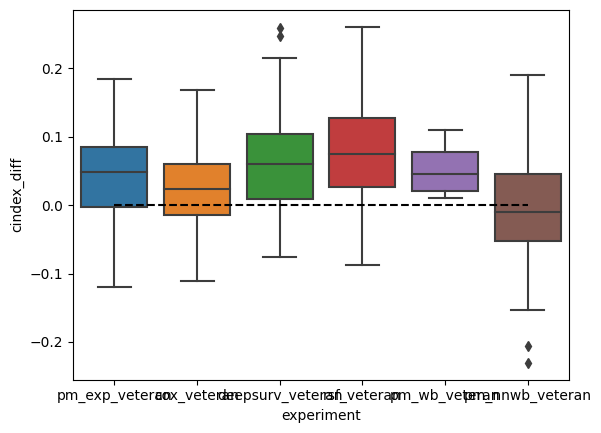

In [61]:
sns.boxplot(data = results_new, x='experiment', y='cindex_diff')
plt.hlines(y=0, xmax=5, xmin=0, colors='black', linestyles='dashed')